#Understaning Data

In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib


In [2]:
import pandas as pd
import numpy as np


In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/All-CSV-ML-Data-Files-Download/refs/heads/master/spam.tsv', sep = '\t')


In [4]:
#display all column
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_colwidth', None)


In [5]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [6]:
df['message'].iloc[0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
 2   length   5572 non-null   int64 
 3   punct    5572 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 174.3+ KB


In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
length,5572.0,80.489950,59.942907,2.0,36.0,62.0,122.0,910.0
punct,5572.0,4.177495,4.623919,0.0,2.0,3.0,6.0,133.0


##Check missing value

In [9]:
df.isnull().sum()

,0
label,0
message,0
length,0
punct,0


##Check Duplicate Rows

In [10]:
df[df.duplicated()]


,label,message,length,punct
103,ham,As per your request 'Melle Melle (Oru Minnamin...,160,6
154,ham,As per your request 'Melle Melle (Oru Minnamin...,160,6
207,ham,"As I entered my cabin my PA said, '' Happy B'd...",156,13
223,ham,"Sorry, I'll call later",22,2
326,ham,No calls..messages..missed calls,32,4
...,...,...,...,...
5524,spam,You are awarded a SiPix Digital Camera! call 0...,152,9
5535,ham,"I know you are thinkin malaria. But relax, chi...",329,6
5539,ham,Just sleeping..and surfing,26,2
5553,ham,Hahaha..use your brain dear,27,2


In [11]:
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

In [12]:
df

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1


In [13]:
df.shape

(5169, 4)

In [14]:
df['label'].value_counts()

,count
label,
ham,4516
spam,653


##The data show unbalancing



##Using Undersampling to make Dataset Balancing.


In [15]:
ham = df[df['label'] == 'ham']
ham.shape

(4516, 4)

In [16]:
spam = df[df['label'] == 'spam']
spam.shape

(653, 4)

In [17]:
ham = ham.sample(spam.shape[0])
ham.shape

(653, 4)

In [18]:
data = pd.concat([ham, spam], axis=0, ignore_index=True)


In [19]:
data.duplicated().sum()

0

In [20]:
data.head(10)

,label,message,length,punct
0,ham,Was doing my test earlier. I appreciate you. W...,68,3
1,ham,Yes. It's all innocent fun. O:-),32,6
2,ham,No problem baby. Is this is a good time to tal...,77,3
3,ham,"When I was born, GOD said, ""Oh No! Another IDI...",159,14
4,ham,Did you show him and wot did he say or could u...,64,1
5,ham,Then u better go sleep.. Dun disturb u liao.. ...,73,6
6,ham,Lol you won't feel bad when I use her money to...,80,2
7,ham,True. It is passable. And if you get a high sc...,119,5
8,ham,"Good stuff, will do.",20,2
9,ham,Wife.how she knew the time of murder exactly,44,1


In [21]:
data.sample(frac=0.10)

,label,message,length,punct
1046,spam,sexy sexy cum and text me im wet and warm and ...,144,2
720,spam,Want 2 get laid tonight? Want real Dogging loc...,159,7
620,ham,Good night my dear.. Sleepwell&amp;Take care,44,4
944,spam,You have WON a guaranteed £1000 cash or a £200...,154,2
811,spam,URGENT! We are trying to contact U. Todays dra...,156,5
...,...,...,...,...
489,ham,There are no other charges after transfer char...,86,0
780,spam,Last chance 2 claim ur £150 worth of discount ...,160,7
640,ham,Captain is in our room:),24,2
327,ham,"I.ll always be there, even if its just in spir...",103,6


#Exploratory Data Analysis

In [22]:
df.groupby('label').mean(numeric_only=True)[['length', 'punct']]


,length,punct
label,,
ham,70.905890,3.830159
spam,137.704441,5.643185


In [23]:
data.groupby('label').mean(numeric_only=True)[['length', 'punct']]


,length,punct
label,,
ham,70.323124,3.678407
spam,137.704441,5.643185


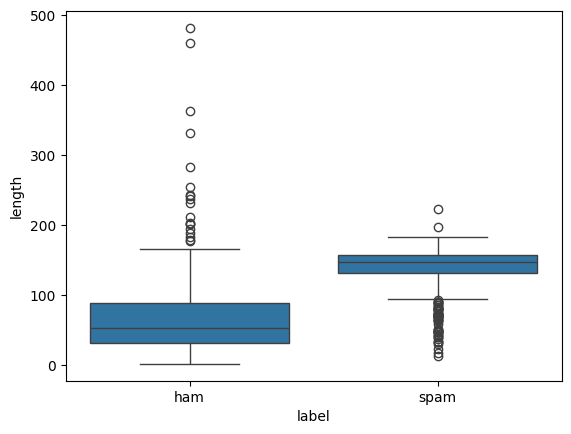

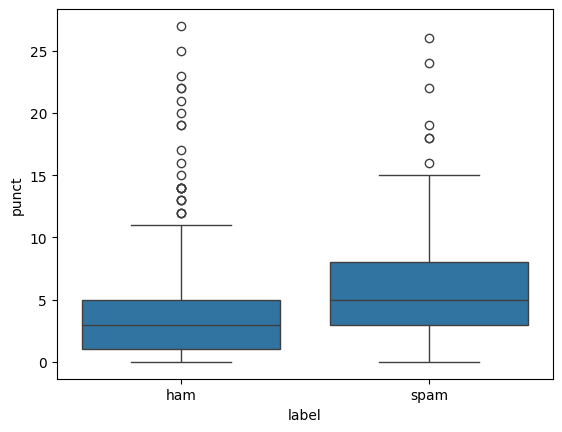

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='label', y='length', data=data)
plt.show()



sns.boxplot(x='label', y='punct', data=data)
plt.show()



<function matplotlib.pyplot.show(close=None, block=None)>

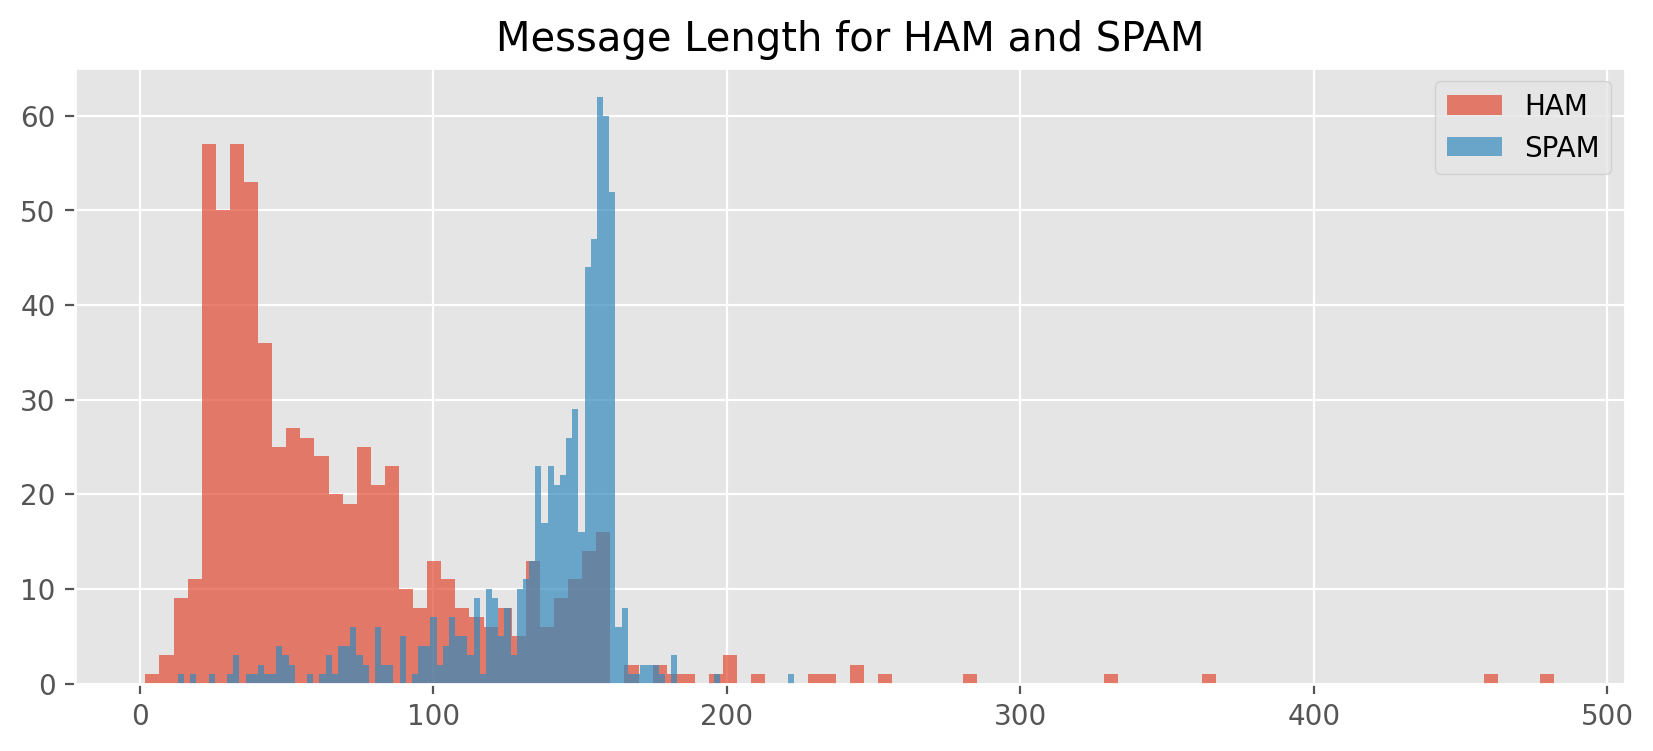

In [25]:
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = (10, 4)
plt.style.use('ggplot')
plt.hist(ham['length'], bins=100, alpha=0.7, label='HAM')
plt.hist(spam['length'], bins=100, alpha=0.7, label='SPAM')
plt.title('Message Length for HAM and SPAM')
plt.legend()
plt.show

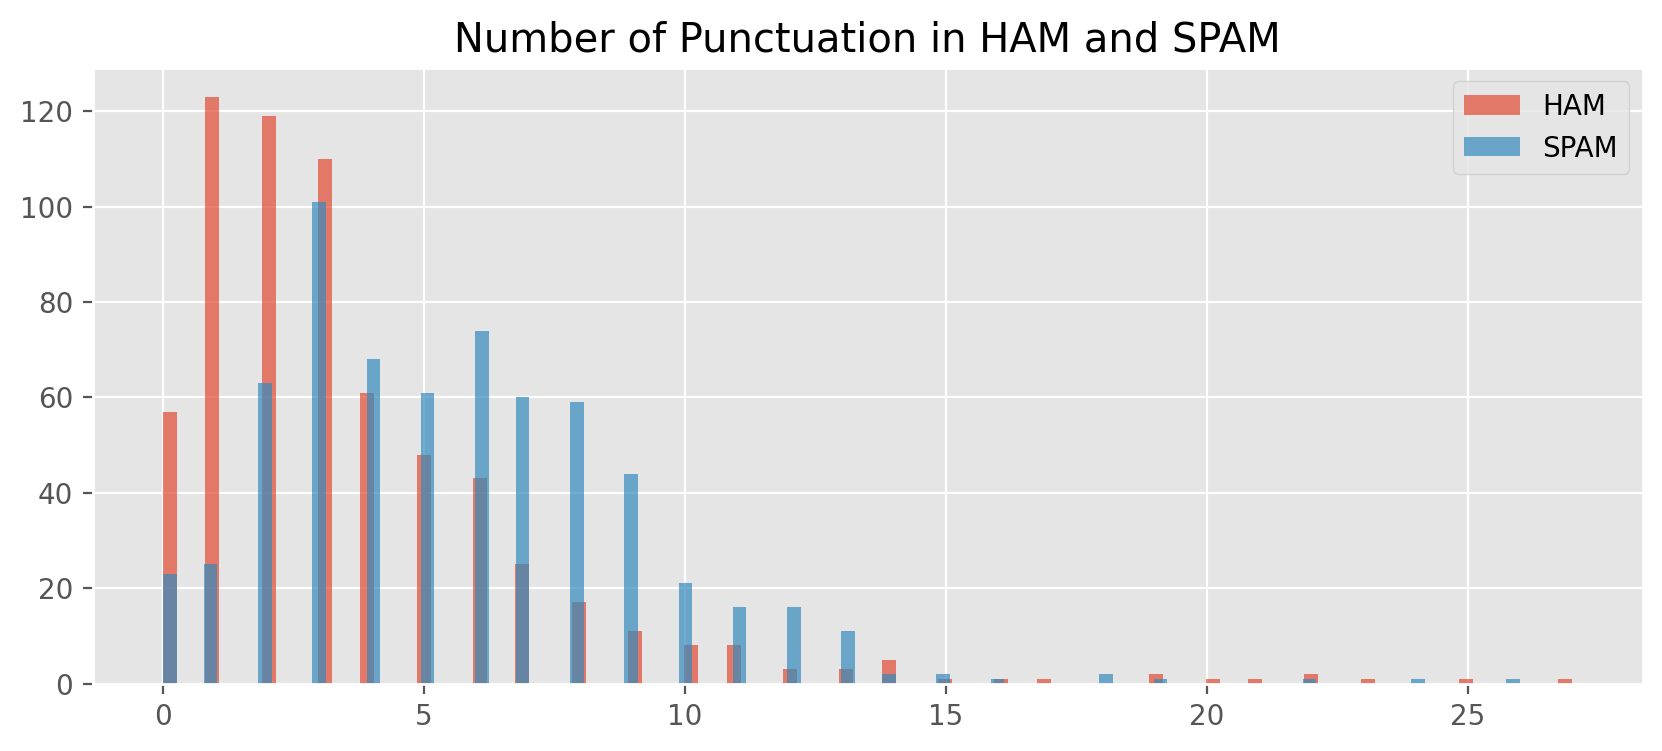

In [26]:
plt.hist(ham['punct'], bins=100, alpha=0.7, label='HAM')
plt.hist(spam['punct'], bins=100, alpha=0.7, label='SPAM')
plt.title('Number of Punctuation in HAM and SPAM')
plt.legend()
plt.show()

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

In [28]:
X_train, X_test, y_train, y_test = train_test_split(data['message'], data['label'],
                                                   test_size=0.2, random_state=0,
                                                   shuffle=True, stratify=data['label'])

X_train.shape, X_test.shape


((1044,), (262,))

In [29]:
clf = Pipeline([('tfidf', TfidfVectorizer()),
                ('rfc', RandomForestClassifier(n_estimators=100, n_jobs=-1))])

clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('rfc', RandomForestClassifier(n_jobs=-1))])

In [30]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         ham       0.92      0.99      0.96       131
        spam       0.99      0.92      0.95       131

    accuracy                           0.95       262
   macro avg       0.96      0.95      0.95       262
weighted avg       0.96      0.95      0.95       262



In [31]:
data['message'].iloc[985]

'U are subscribed to the best Mobile Content Service in the UK for £3 per ten days until you send STOP to 83435. Helpline 08706091795.'

In [32]:
data['message'].iloc[100]

'I think steyn surely get one wicket:)'

In [37]:
clf.predict(["I think steyn surely get one wicket:",'Compete in weekly and monthly battles based on ROI and PnL. Win your share of up to 120,000 USDT.'])

array(['ham', 'spam'], dtype=object)

In [34]:
import pickle

pickle.dump(clf, open('model.pkl', 'wb'))

In [35]:
model = pickle.load(open('model.pkl', 'rb'))
